In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
print('First 5 rows:')
print(df.head())
print('\nInfo:')
df.info()
print('\nMissing values:')
print(df.isnull().sum())


First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 no

In [6]:
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_processed.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,False,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,1,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,1,True,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,1,True,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,0,163,1,0.6,1,False,...,False,False,True,False,False,False,False,False,True,False


In [7]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   target     303 non-null    int64  
 9   cp_1       303 non-null    bool   
 10  cp_2       303 non-null    bool   
 11  cp_3       303 non-null    bool   
 12  restecg_1  303 non-null    bool   
 13  restecg_2  303 non-null    bool   
 14  slope_1    303 non-null    bool   
 15  slope_2    303 non-null    bool   
 16  ca_1       303 non-null    bool   
 17  ca_2       303 non-null    bool   
 18  ca_3       303 non-null    bool   
 19  ca_4       303 non-null    bool   
 20  thal_1    

In [8]:
X = df_processed.drop('target', axis=1)
y = df_processed['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, shuffle=True, stratify=y)

In [11]:
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (242, 22)
X_test shape: (61, 22)
y_train shape: (242,)
y_test shape: (61,)


In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = ["LogisticRegression", 
          "KNN",
          "NaiveBayes",
          "SVM rbf",
          "SVM poly",
          "SVM poly params",
          "Decision Tree",
          "Random Forest",]

accuracy_list, precsision_list, recall_list, f1_list, cv_mean_list, aucScore_list = [], [], [], [], [], []

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

model = lr.fit(X_train_scaled, y_train)

y_pred_lr = model.predict(X_test_scaled)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

accuracy_list.append(accuracy_lr)
precsision_list.append(precision_lr)
recall_list.append(recall_lr)
f1_list.append(f1_score_lr)

print(f"\nConfusion Matrix:\n{cm}")
print(f"\nAccuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_score_lr}")


Confusion Matrix:
[[23  5]
 [ 4 29]]

Accuracy: 0.8524590163934426
Precision: 0.8529411764705882
Recall: 0.8787878787878788
F1 Score: 0.8656716417910447


In [21]:
from sklearn.model_selection import cross_val_score

accuraccies = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, cv=5, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


In [24]:
mean = accuraccies.mean()

cv_mean_list.append(mean)

print("Mean accuracy for cv: ", f"{mean:.2f}")

Mean accuracy for cv:  0.84


Calculating probabilities for ROC curve...
Probabilities calculated.

Logistic Regression AUC Score: 0.9134
Plotting ROC Curve...


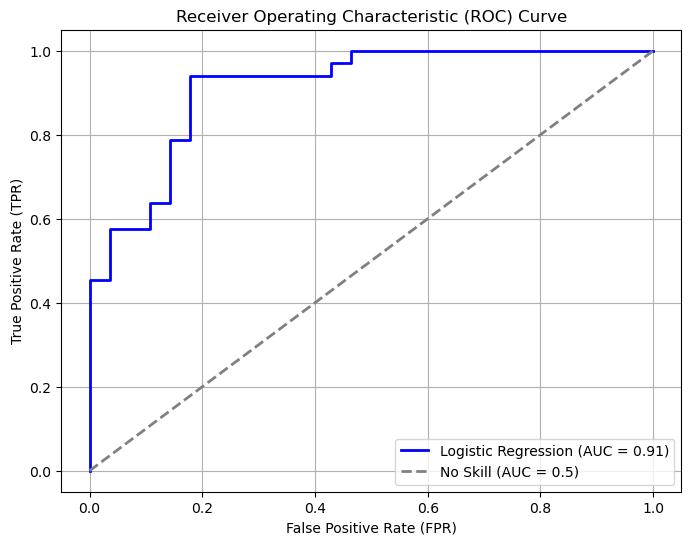

Plot displayed.


In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


print("Calculating probabilities for ROC curve...")
y_pred_proba_lr = model.predict_proba(X_test_scaled)[:, 1]
print("Probabilities calculated.")

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nLogistic Regression AUC Score: {auc_lr:.4f}")

print("Plotting ROC Curve...")
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='No Skill (AUC = 0.5)') 

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right') 
plt.grid(True)
plt.show()
print("Plot displayed.")


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1, metric='euclidean')
knn = knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [29]:
cm_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

accuracy_list.append(accuracy_knn)
precsision_list.append(precision_knn)
recall_list.append(recall_knn)
f1_list.append(f1_score_knn)

print(f"\nConfusion Matrix:\n{cm_knn}")
print(f"\nAccuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_score_knn}")


Confusion Matrix:
[[23  5]
 [ 4 29]]

Accuracy: 0.8524590163934426
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1 Score: 0.8695652173913043



Calculating probabilities for ROC curve (KNN)...
Probabilities calculated.

KNN AUC Score (k=5): 0.9172
Plotting ROC Curve (KNN)...


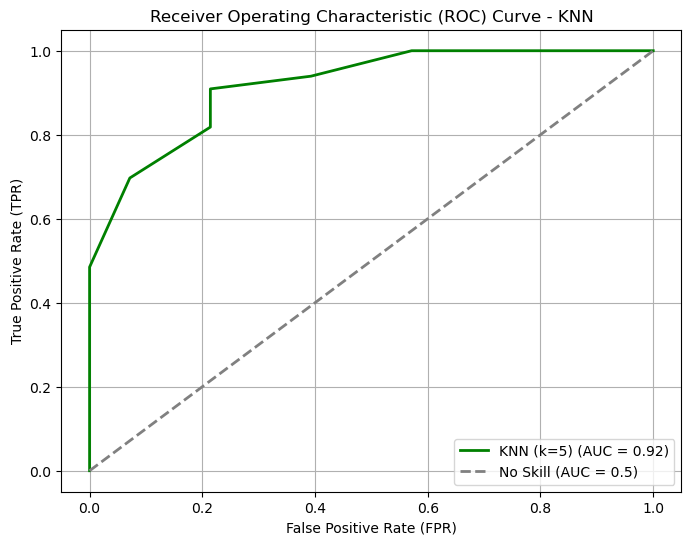

Plot displayed.


In [30]:
print("\nCalculating probabilities for ROC curve (KNN)...")
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
print("Probabilities calculated.")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"\nKNN AUC Score (k=5): {auc_knn:.4f}")

# Cell: Plot the ROC Curve
print("Plotting ROC Curve (KNN)...")
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (k=5) (AUC = {auc_knn:.2f})') # Changed color
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='No Skill (AUC = 0.5)')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Plot displayed.")


In [33]:
accuraccies_knn = cross_val_score(estimator=knn, X=X_train_scaled, y=y_train, cv=5, n_jobs=-1, verbose=2)
accuraccies

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


array([0.7755102 , 0.83673469, 0.83333333, 0.875     , 0.89583333])

In [34]:
mean = accuraccies_knn.mean()

cv_mean_list.append(mean)

print("Mean accuracy for cv: ", f"{mean:.2f}")

Mean accuracy for cv:  0.82


Training Support Vector Machine (Linear Kernel)...
Model training complete.

Making predictions on the test set using SVM (Linear)...
Predictions made.

SVM (Linear) Accuracy: 0.8197

Classification Report (SVM Linear):
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Confusion Matrix (SVM Linear):


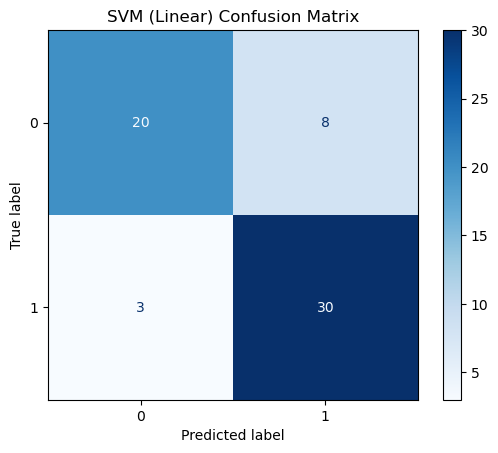


Calculating probabilities for ROC curve (SVM Linear)...
SVM (Linear) AUC Score: 0.9123
Plotting ROC Curve (SVM Linear)...


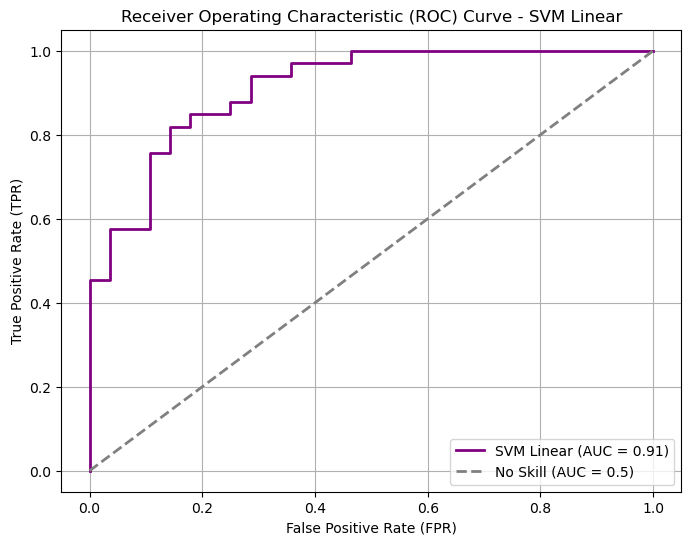

Plot displayed.


In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("Training Support Vector Machine (Linear Kernel)...")

svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)

svm_linear_model.fit(X_train_scaled, y_train)

print("Model training complete.")

print("\nMaking predictions on the test set using SVM (Linear)...")
y_pred_svm_linear = svm_linear_model.predict(X_test_scaled)
print("Predictions made.")

accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print(f"\nSVM (Linear) Accuracy: {accuracy_svm_linear:.4f}")

print("\nClassification Report (SVM Linear):")
print(classification_report(y_test, y_pred_svm_linear))

print("\nConfusion Matrix (SVM Linear):")
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
disp_svm_linear = ConfusionMatrixDisplay(confusion_matrix=cm_svm_linear, display_labels=svm_linear_model.classes_)
disp_svm_linear.plot(cmap=plt.cm.Blues)
plt.title("SVM (Linear) Confusion Matrix")
plt.show()

print("\nCalculating probabilities for ROC curve (SVM Linear)...")
y_pred_proba_svm_linear = svm_linear_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_pred_proba_svm_linear)
auc_svm_linear = roc_auc_score(y_test, y_pred_proba_svm_linear)
print(f"SVM (Linear) AUC Score: {auc_svm_linear:.4f}")

print("Plotting ROC Curve (SVM Linear)...")
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_linear, tpr_svm_linear, color='purple', lw=2, label=f'SVM Linear (AUC = {auc_svm_linear:.2f})') # Changed color
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM Linear')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Plot displayed.")


Training Support Vector Machine (RBF Kernel)...
Model training complete.

Making predictions on the test set using SVM (RBF)...
Predictions made.

SVM (RBF) Accuracy: 0.8197

Classification Report (SVM RBF):
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Confusion Matrix (SVM RBF):


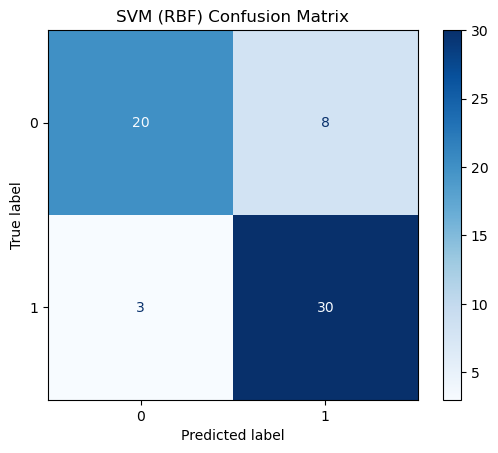


Calculating probabilities for ROC curve (SVM RBF)...
SVM (RBF) AUC Score: 0.9177
Plotting ROC Curve (SVM RBF)...


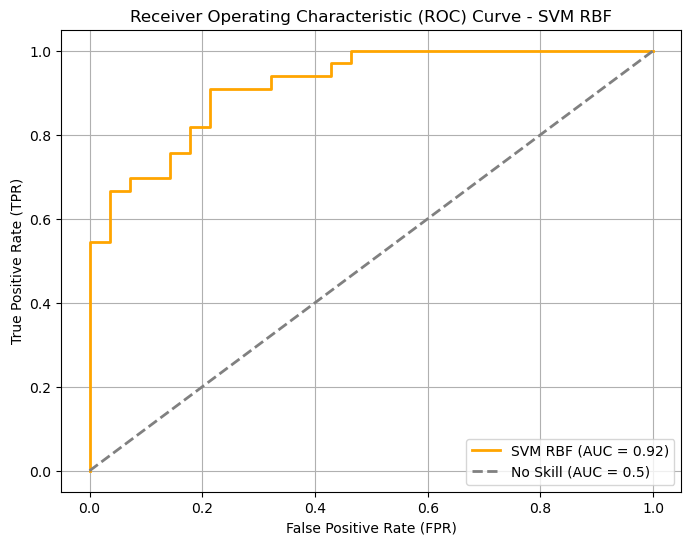

Plot displayed.


In [36]:
print("\nTraining Support Vector Machine (RBF Kernel)...")

svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42) # or just SVC(probability=True, random_state=42)

svm_rbf_model.fit(X_train_scaled, y_train)

print("Model training complete.")

print("\nMaking predictions on the test set using SVM (RBF)...")
y_pred_svm_rbf = svm_rbf_model.predict(X_test_scaled)
print("Predictions made.")

accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"\nSVM (RBF) Accuracy: {accuracy_svm_rbf:.4f}")

print("\nClassification Report (SVM RBF):")
print(classification_report(y_test, y_pred_svm_rbf))

print("\nConfusion Matrix (SVM RBF):")
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
disp_svm_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_svm_rbf, display_labels=svm_rbf_model.classes_)
disp_svm_rbf.plot(cmap=plt.cm.Blues)
plt.title("SVM (RBF) Confusion Matrix")
plt.show()

print("\nCalculating probabilities for ROC curve (SVM RBF)...")
y_pred_proba_svm_rbf = svm_rbf_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_pred_proba_svm_rbf)
auc_svm_rbf = roc_auc_score(y_test, y_pred_proba_svm_rbf)
print(f"SVM (RBF) AUC Score: {auc_svm_rbf:.4f}")

print("Plotting ROC Curve (SVM RBF)...")
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='orange', lw=2, label=f'SVM RBF (AUC = {auc_svm_rbf:.2f})') # Changed color
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM RBF')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Plot displayed.")


Training Decision Tree Classifier...
Model training complete.

Making predictions on the test set using Decision Tree...
Predictions made.

Decision Tree Accuracy: 0.8033

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Confusion Matrix (Decision Tree):


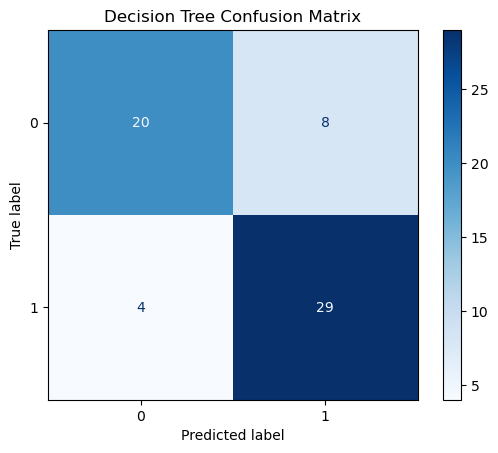


Calculating probabilities for ROC curve (Decision Tree)...
Decision Tree AUC Score: 0.7965
Plotting ROC Curve (Decision Tree)...


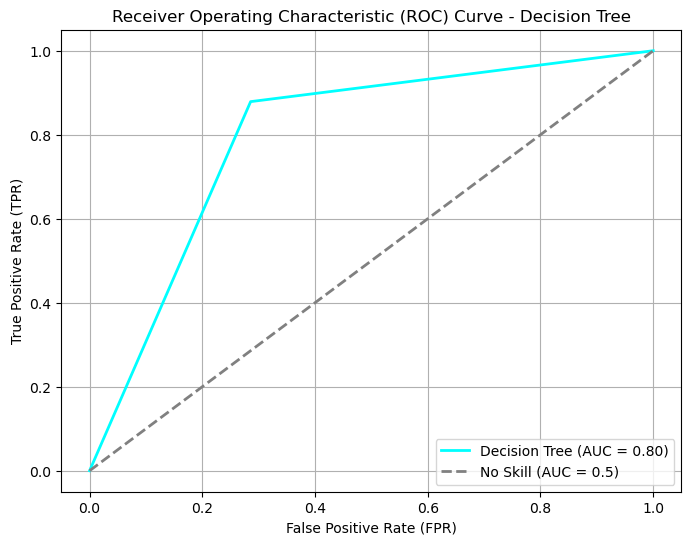

Plot displayed.


In [37]:

print("\nTraining Decision Tree Classifier...")

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train)

print("Model training complete.")

print("\nMaking predictions on the test set using Decision Tree...")
y_pred_dt = dt_model.predict(X_test_scaled)
print("Predictions made.")

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Decision Tree):")
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("\nCalculating probabilities for ROC curve (Decision Tree)...")
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"Decision Tree AUC Score: {auc_dt:.4f}")

print("Plotting ROC Curve (Decision Tree)...")
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='cyan', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})') # Changed color
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Plot displayed.")


Training Random Forest Classifier...
Model training complete.

Making predictions on the test set using Random Forest...
Predictions made.

Random Forest Accuracy: 0.8033

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Confusion Matrix (Random Forest):


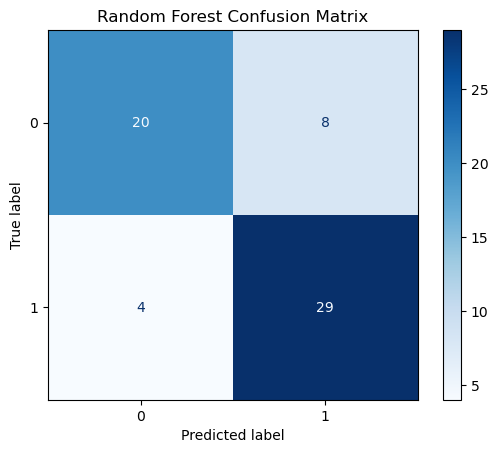


Calculating probabilities for ROC curve (Random Forest)...
Random Forest AUC Score: 0.8782
Plotting ROC Curve (Random Forest)...


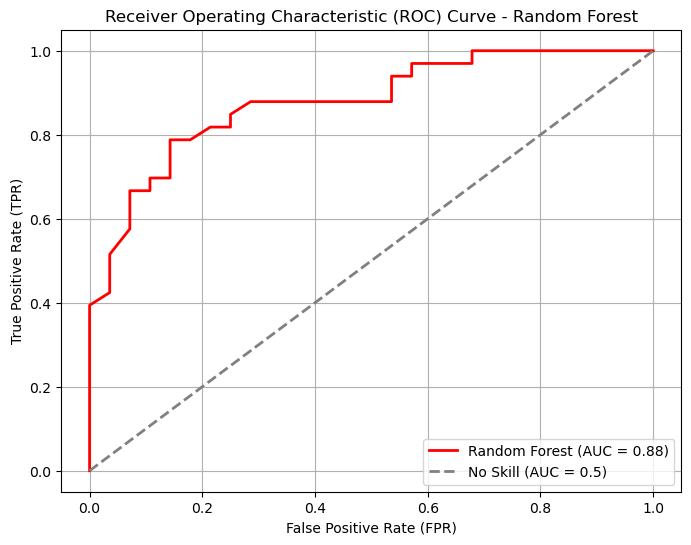

Plot displayed.


In [38]:
print("\nTraining Random Forest Classifier...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100 trees is a common default

rf_model.fit(X_train_scaled, y_train)

print("Model training complete.")

print("\nMaking predictions on the test set using Random Forest...")
y_pred_rf = rf_model.predict(X_test_scaled)
print("Predictions made.")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

print("\nCalculating probabilities for ROC curve (Random Forest)...")
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest AUC Score: {auc_rf:.4f}")

print("Plotting ROC Curve (Random Forest)...")
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})') # Changed color
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("Plot displayed.")

